In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas
import pickle
import os
import re
import seaborn as sns
from sklearn import metrics
sns.set_style('white')
sns.set_palette('colorblind')

In [2]:
def attention_single_file(filename):
    with open(filename, 'rb') as file_:
        result = pickle.load(file_)
    return result

In [3]:
def prediction_filenames(dirname):
    return [run_prediction for run_prediction in os.listdir(dirname)
            if os.path.isfile(os.path.join(dirname, run_prediction)) and 'predictions' in run_prediction]

In [4]:
def labels_single_file(filename):
    result = pandas.read_csv(filename, sep='\t')
    return result

In [6]:
classifier = '18-08-29-18-24'
partition = 2
dataset = 'dev'
att_matrix = attention_single_file(
    '/home/mteruel/am/results/ukpnets/definitive/{}/attention_partition{}_ukp_{}.p'.format(classifier, partition, dataset))
prediction = labels_single_file(
    '/home/mteruel/am/results/ukpnets/definitive/{}/predictions_partition{}_ukp_{}.conll'.format(classifier, partition, dataset))
prediction.loc[:,'Attention Score'] = numpy.abs(numpy.concatenate(att_matrix['ukp']))
prediction.loc[:, 'Correct'] = (prediction.Predicted == prediction['True'])

/home/mteruel/miniconda3/envs/env_am/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


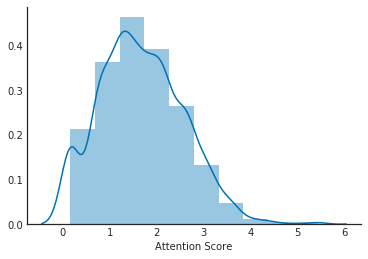

In [7]:
sns.distplot(prediction['Attention Score'], bins=10)
sns.despine()

In [8]:
prediction['Attention Score'].describe()

count    2291.000000
mean        1.675160
std         0.894487
min         0.156088
25%         1.025004
50%         1.621429
75%         2.231454
max         5.431878
Name: Attention Score, dtype: float64

In [9]:
prediction[350:450]

,Token,True,Predicted,Sentence,Attention Score,Correct
350,appeal,I-claim,I-claim,20,1.963159,True
351,on,I-claim,I-claim,20,0.902108,True
352,points,I-claim,I-claim,20,1.495391,True
353,of,I-claim,I-claim,20,0.737116,True
354,law,I-claim,I-claim,20,1.826038,True
355,without,I-claim,I-claim,20,1.868123,True
356,a,I-claim,I-claim,20,0.580411,True
357,reasoned,I-claim,I-claim,20,2.548313,True
358,decision,I-claim,I-claim,20,2.231454,True
359,infringed,I-claim,I-claim,20,2.632681,True


In [10]:
import json

In [11]:
json_words = json.dumps(
    prediction[['Token', 'Attention Score', 'Sentence', 'Predicted', 'Correct']].values.tolist()[350:800]
)

In [12]:
json_words[:300]

'[["appeal", 1.9631586074829102, 20, "I-claim", true], ["on", 0.9021084308624268, 20, "I-claim", true], ["points", 1.4953912496566772, 20, "I-claim", true], ["of", 0.7371160387992859, 20, "I-claim", true], ["law", 1.8260383605957031, 20, "I-claim", true], ["without", 1.8681228160858154, 20, "I-claim"'

How to run D3 on Jupyter

It is still a mistery, and sometimes it does not work, but this worked https://blog.thedataincubator.com/2015/08/embedding-d3-in-an-ipython-notebook/


In [13]:
from IPython.core.display import display, HTML
from string import Template
import json

In [14]:
HTML('<script src="https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.16/d3.min.js"></script>')

In [15]:
HTML('<script src="https://d3js.org/d3-color.v1.min.js"></script>')

In [16]:
HTML('<script src="https://d3js.org/d3-interpolate.v1.min.js"></script>')

In [17]:
HTML('<script src="https://d3js.org/d3-scale-chromatic.v1.min.js"></script>')

In [18]:
HTML('<script src="textChart.js"></script>')

In [19]:
HTML("""<script>
if (d3 === undefined) {
    alert('No d3 library');
}
if (TextChart === undefined) {
    alert('No Chart library');
}
</script>""")

In [20]:
js_text_template = Template('''
var nouns = JSON.parse('$json_data');

opts = {
  lineHeight: 16,
  width: 900,
  height: 600,
  linePadding: 10,
  useColor: false,
  labelColors: {
    'B-claim': '#FF5964',
    'I-claim': '#FF5964',
    'B-premise': '#35A7FF',  // blue
    'I-premise': '#35A7FF',
    'O': '#888888'
  }
}
chart = new TextChart(nouns, opts);
chart.draw('text-container');
''')

html_template = Template('''
    <div id='text-container'></div>
    <script src="textChart.js"></script>
    <script>$js_text</script>
''')

js_text = js_text_template.substitute({
    'json_data': json_words
})

HTML(html_template.substitute({'js_text': js_text}))